In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the cleaned CSV
df = pd.read_csv("cleaned_data/happiness_cleaned.csv")

# View structure
df.head()




Matplotlib is building the font cache; this may take a moment.


,country,region,year,happiness_score,gdp,social_support,life_expectancy,freedom,corruption,generosity
0,Switzerland,Western Europe,2015,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2015,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,2015,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,2015,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,2015,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [14]:
# Check data types
print(df.dtypes)

# Rename columns for consistency
df.columns = df.columns.str.lower().str.strip()

# Confirm no missing values
print(df.isnull().sum())


country             object
region              object
year                 int64
happiness_score    float64
gdp                float64
social_support     float64
life_expectancy    float64
freedom            float64
corruption         float64
generosity         float64
dtype: object
country            0
region             0
year               0
happiness_score    0
gdp                0
social_support     0
life_expectancy    0
freedom            0
corruption         0
generosity         0
dtype: int64


<Axes: title={'center': 'Average Happiness Over Years'}, xlabel='year'>

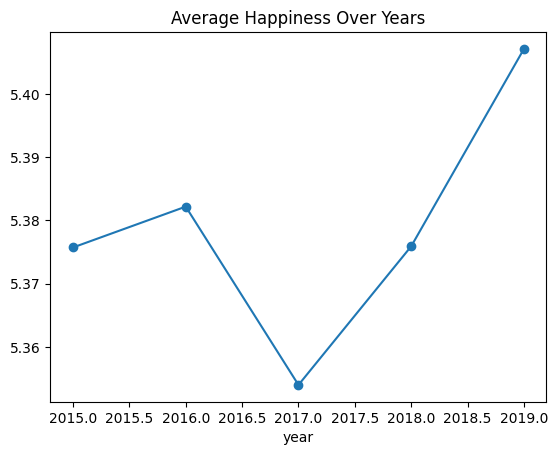

In [ ]:
#Average Happiness by Year
df.groupby("year")["happiness_score"].mean().plot(marker='o', title='Average Happiness Over Years')


<Axes: title={'center': 'Top 10 Happiest Countries (2015–2019)'}, xlabel='country'>

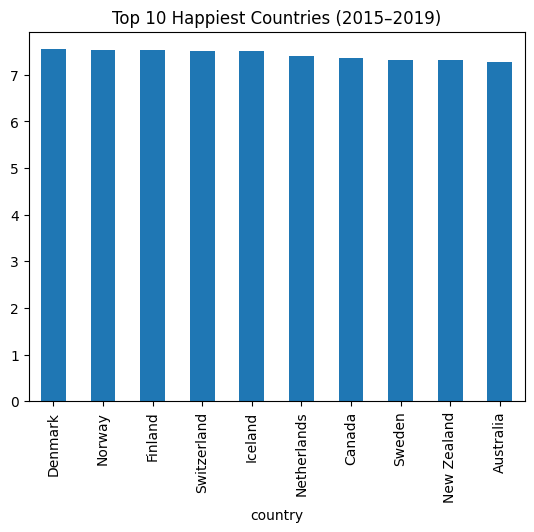

In [ ]:
# Top 10 Happiest Countries (All Years)
top_happy = df.groupby("country")["happiness_score"].mean().sort_values(ascending=False).head(10)
top_happy.plot(kind='bar', title='Top 10 Happiest Countries (2015–2019)')


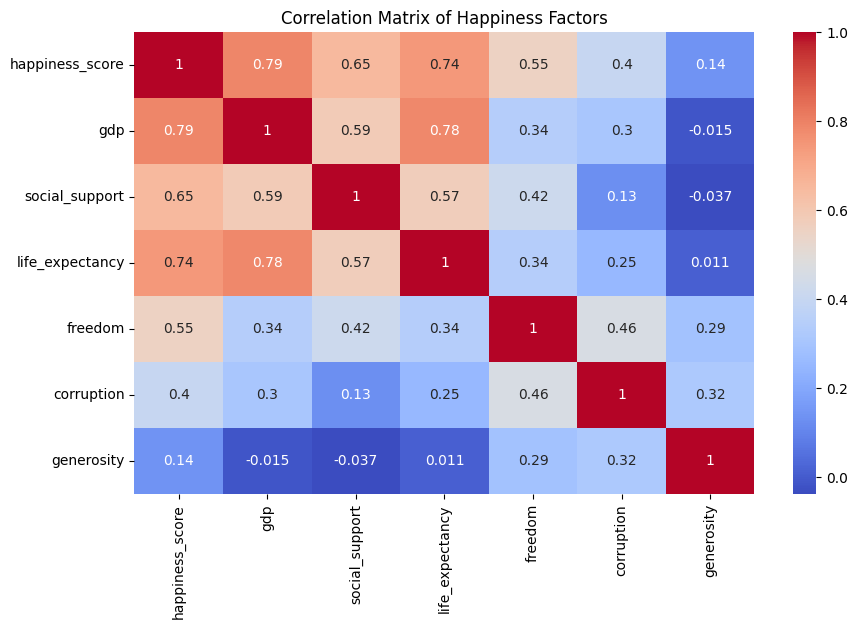

In [ ]:
#Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
numeric_cols = ['happiness_score', 'gdp', 'social_support', 'life_expectancy', 'freedom', 'corruption', 'generosity']
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Happiness Factors")
plt.show()


<Axes: title={'center': 'Average Happiness Score by Region'}, ylabel='region'>

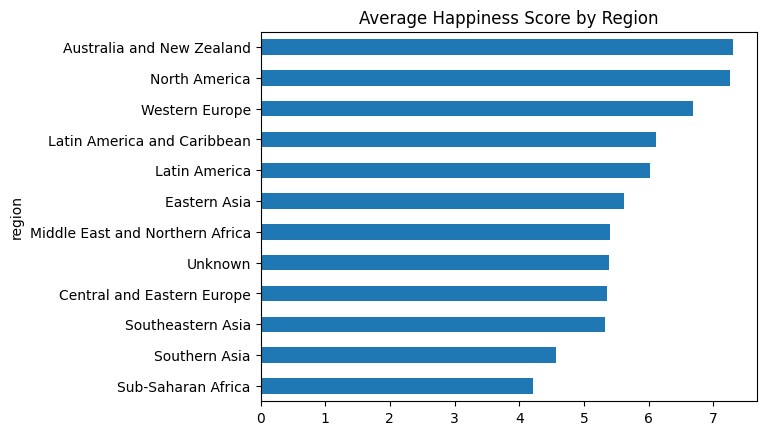

In [18]:
#Region-Level Analysis
# Average happiness by region
region_avg = df.groupby("region")["happiness_score"].mean().sort_values()
region_avg.plot(kind='barh', title="Average Happiness Score by Region")


In [22]:
#Predicting Happiness
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['gdp', 'social_support', 'life_expectancy', 'freedom', 'corruption', 'generosity']]
y = df['happiness_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)

print("R² score:", model.score(X_test, y_test))



R² score: 0.7290578060926064
